In [95]:
import numpy as np
import cv2
from math import sqrt,pi,exp
from matplotlib.pyplot import bar
import skimage.io as io
import matplotlib.pyplot as plt

In [96]:

avgMean=0
img = cv2.imread('1.png', 0)
var = np.var(img)
mean = np.mean(img)
avgMean+=mean
print(var,"   ", mean)
img = cv2.imread('2.png', 0)
var = np.var(img)
mean = np.mean(img)
avgMean+=mean
print(var,"   ", mean)
img = cv2.imread('3.png', 0)
var = np.var(img)
mean = np.mean(img)
avgMean+=mean
print(var,"   ", mean)
img = cv2.imread('4.png', 0)
var = np.var(img)
mean = np.mean(img)
avgMean+=mean
print(var,"   ", mean)
img = cv2.imread('5.png', 0)
var = np.var(img)
mean = np.mean(img)
avgMean+=mean
print(var,"   ", mean)
img = cv2.imread('6.png', 0)
var = np.var(img)
mean = np.mean(img)
avgMean+=mean
print(var,"   ", mean)
img = cv2.imread('7.png', 0)
var = np.var(img)
mean = np.mean(img)
avgMean+=mean
print(var,"   ", mean)
img = cv2.imread('8.png', 0)
var = np.var(img)
mean = np.mean(img)
avgMean+=mean
print(var,"   ", mean)
img = cv2.imread('9.png', 0)
var = np.var(img)
mean = np.mean(img)
avgMean+=mean
print(var,"   ", mean)
img = cv2.imread('10.png', 0)
var = np.var(img)
mean = np.mean(img)
avgMean+=mean
print(var,"   ", mean)
img = cv2.imread('11.png', 0)
var = np.var(img)
mean = np.mean(img)
avgMean+=mean
print("11" ,var,"   ", mean)
avgMean/=11

img = cv2.imread('LB1.png', 0)
var = np.var(img)
mean = np.mean(img)
print("g" ,var,"   ", mean)

2035.5912231599293     242.91985050665193
2496.943592563108     243.8088887429387
2409.878757528085     244.18458188672807
2000.1150138669684     246.2859026181345
2381.806441761327     244.72021601597268
4146.815622860158     236.32115126296463
4392.754520870507     236.41967443547344
6474.403854934875     225.44299995281202
6574.549840454742     224.80675325872195
4989.285404283178     233.6459589231584
11 6218.803296613624     227.03423660430974
g 1218.8122672303077     179.63965506207603


<BarContainer object of 256 artists>

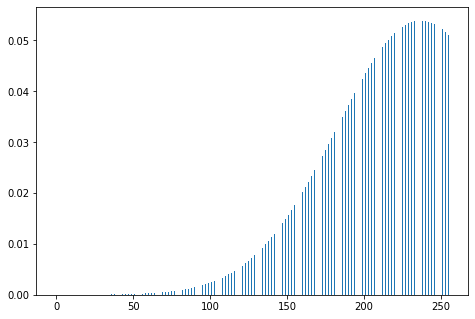

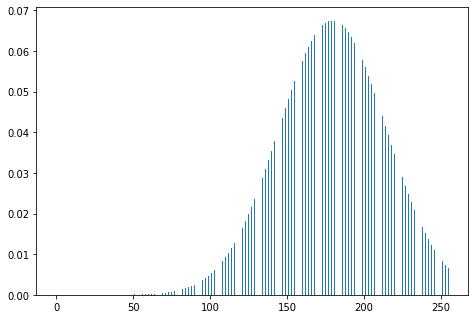

In [97]:
def GaussianDistribution(mean,var):
    distribution=np.zeros(256)
    for i in range(256):
        distribution[i]=1/sqrt(2*pi*sqrt(var))*exp(-1*((i-mean)**2)/(2*var))
    return distribution

dataIdeal=GaussianDistribution(avgMean,3000)
dataReal=GaussianDistribution(mean,var)

X = np.arange(256)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, dataIdeal,width = 0.25)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, dataReal, width = 0.25)

In [98]:
def CDF(gaussian):
    return np.cumsum(gaussian)

CDFIdeal=CDF(dataIdeal)
CDFReal=CDF(dataReal)

In [99]:
def mappingIntesity():
    Mapped={}
    for i in range(256):
        Mapped[i]=255
        toFind=CDFReal[i]
        for j in range(256):
            if(abs(toFind-CDFIdeal[j])<=0.1):
                Mapped[i]=j
                break
    return Mapped

intensityMap=mappingIntesity()

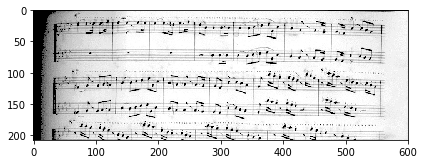

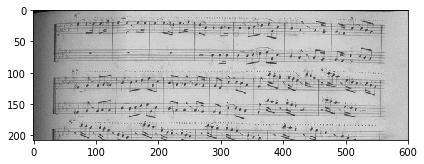

True

In [100]:
imgCopy=np.copy(img)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        img[i][j]=intensityMap[img[i][j]]

io.imshow(img)
io.show()

io.imshow(imgCopy)
io.show()
cv2.imwrite("out.png", img) 